# Niklas Tecklenburg (88481171)

## Research question/interests
After conducting the Exploaratory Data analysis, I came to the conclusion, that it might be difficult to identify proper coupling parameters for the Team and their drivers. On the other hand the analysis raised my curiosity, looking into individual races. Here I would like to come up with an analysis / analysis criteria, to evaluate which races in the past have been the most interesting one for spectators.

## Import Packages for the EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
circuits = pd.read_csv('../data/raw/circuits.csv', na_values=['\\N'])
constructor_res = pd.read_csv('../data/raw/constructor_results.csv', na_values=['\\N'])
constructor_stand = pd.read_csv('../data/raw/constructor_standings.csv', na_values=['\\N'])
constructors = pd.read_csv('../data/raw/constructors.csv', na_values=['\\N'])
driver_stand = pd.read_csv('../data/raw/driver_standings.csv', na_values=['\\N'])
drivers = pd.read_csv('../data/raw/drivers.csv', na_values=['\\N'])
lap_times = pd.read_csv('../data/raw/lap_times.csv', na_values=['\\N'])
pit_stops = pd.read_csv('../data/raw/pit_stops.csv', na_values=['\\N'])
qualifying = pd.read_csv('../data/raw/qualifying.csv', na_values=['\\N'])
races = pd.read_csv('../data/raw/races.csv', na_values=['\\N'])
results = pd.read_csv('../data/raw/results.csv', na_values=['\\N'])
seasons = pd.read_csv('../data/raw/seasons.csv', na_values=['\\N'])
status = pd.read_csv('../data/raw/status.csv', na_values=['\\N'])

# Exploratory Data Analysis
As the Formula 1, the Rules and the Cars have changed over time, I am focusing on the development over time in my EDA. The EDA includes the following Analysis:
- Number of Seasons in the Dataset
- Races per Season
- Number of Drivers Winning a race per Season
- Development of Pit Stop Times over time
- Average number of Stops per Race per Season
- Number of Collisions (Driver could not finish race) per Year
- Average Number of Lappings in a Race per Season
- How did the max speed evolved

## Number of Seasons in the Dataset

In [6]:
len(seasons)

72

Our Dataset contains data for 72 Seasons. One has to notice, that results of the current season are also included, but this season is not yet over.

## Races per Seson

In [45]:
races_per_season = races.groupby('year').count().reset_index()[['year', 'raceId']].rename(columns={'raceId':'Number of Races'})

Text(0.5, 1.0, 'Races per Season')

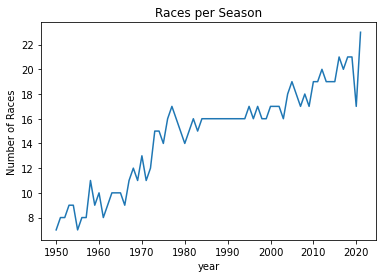

In [46]:
sns.lineplot(x=races_per_season['year'],y=races_per_season['Number of Races']).set_title("Races per Season")

## Number of Drivers Winning a race per Season
As I have noticed that the number of drivers participating in Races/Seasons, the number of Drivers needs to be considered here as well.

In [15]:
race_years = races[['raceId', 'year']]
df_results = results.merge(race_years, on='raceId', how='left')
df_results_driver_count = df_results.groupby('year').nunique().reset_index()
df_results_driver_count = df_results_driver_count[['driverId','year']]
df_results_driver_count = df_results_driver_count.rename(columns={'driverId': '#ofDrivers'})
race_winners = df_results[df_results['positionOrder'] == 1]
race_winners = race_winners.groupby(['year']).nunique().reset_index()
race_winners = race_winners[['driverId','year']]
race_winners = race_winners.rename(columns={'driverId':'#ofWinners'})
race_winners = race_winners.merge(df_results_driver_count, on='year', how='left')
race_winners = race_winners[['year', '#ofWinners', '#ofDrivers']]
race_winners['relative_num_winners'] = race_winners['#ofWinners'] / race_winners['#ofDrivers']
race_winners

,year,#ofWinners,#ofDrivers,relative_num_winners
0,1950,3,81,0.037037
1,1951,6,84,0.071429
2,1952,3,105,0.028571
3,1953,5,108,0.046296
4,1954,4,97,0.041237
...,...,...,...,...
67,2017,5,25,0.200000
68,2018,5,20,0.250000
69,2019,5,20,0.250000
70,2020,5,23,0.217391


Text(0.5, 1.0, 'Number of Drivers over Time')

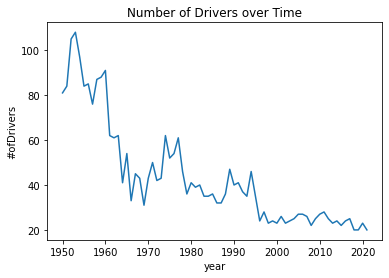

In [16]:
sns.lineplot(x=race_winners['year'],y=race_winners['#ofDrivers']).set_title("Number of Drivers over Time")

We can see that the number of drivers participating in a see has decreased from over 100 in the 50s to just above 20 from mid 90s to today. Looking into the rules there are 10 teams, with 2 drivers each. the peaks result from drivers missing a race and a replacment driver, taking the seat for this race.

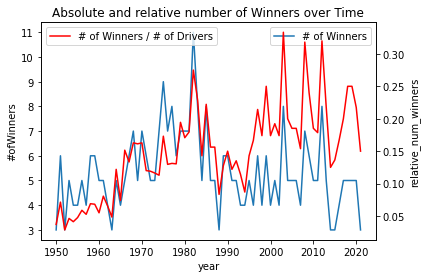

In [30]:
sns.lineplot(x=race_winners['year'],y=race_winners['#ofWinners'])
plt.legend(labels=['# of Winners'])
ax2 = plt.twinx()
sns.lineplot(x=race_winners['year'],y=race_winners['relative_num_winners'], ax=ax2, color="r").set_title("Absolute and relative number of Winners over Time")
plt.legend(labels=['# of Winners / # of Drivers'])

We can see, that there seems to be a slight upwards trend in the relative amount of different drivers, wining a race in a season.

## Development of Pit Stop Times over time

In [22]:
pit_stops

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
8369,1060,832,1,48,16:01:07,21.431,21431
8370,1060,20,2,49,16:02:39,20.841,20841
8371,1060,852,2,51,16:04:57,26.604,26604
8372,1060,1,2,53,16:06:32,21.421,21421


In [28]:
# Average duration
df_pit_stops = pit_stops.merge(race_years, on='raceId', how='left')
df_pit_stops_duration = df_pit_stops.groupby(['year']).mean().reset_index()
df_pit_stops_duration['Avg Duration in Seconds'] = df_pit_stops_duration['milliseconds'] / 1000 
df_pit_stops_duration

,year,raceId,driverId,stop,lap,milliseconds,Avg Duration in Seconds
0,2011,849.680431,219.649910,1.947038,27.572711,24448.849192,24.448849
1,2012,868.778013,326.889006,1.739958,25.416490,23283.769556,23.283770
2,2013,888.593060,461.409043,1.855941,25.309148,24121.318612,24.121319
3,2014,909.029412,456.474265,1.754902,24.678922,55088.632353,55.088632
4,2015,935.900135,505.113360,1.801619,27.109312,25500.213225,25.500213
5,2016,957.864510,544.389282,1.823054,22.561173,124357.194135,124.357194
6,2017,978.353026,586.048991,1.914986,19.799712,56789.619597,56.789620
7,2018,998.692164,636.968284,1.332090,25.369403,24674.283582,24.674284
8,2019,1020.086287,618.389831,1.520801,26.211094,24870.613251,24.870613
9,2020,1039.163300,674.471380,1.712121,26.984848,160940.321549,160.940322


Text(0.5, 1.0, 'Average Pit Stop Duration over Time')

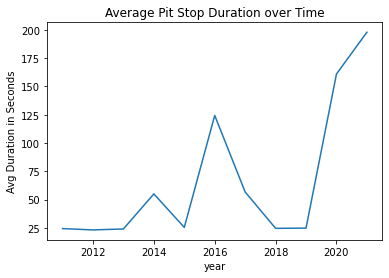

In [31]:
sns.lineplot(x=df_pit_stops_duration['year'], y=df_pit_stops_duration['Avg Duration in Seconds']).set_title("Average Pit Stop Duration over Time")

# Average number of Stops per Race per Season

In [33]:
# Aveage number of stops
df_pit_stops_number = df_pit_stops.groupby(['raceId','driverId']).max().reset_index()
df_pit_stops_number = df_pit_stops_number.groupby(['year']).mean().reset_index()
df_pit_stops_number['avg_stops_per_race'] = df_pit_stops_number['stop']
df_pit_stops_number

,year,raceId,driverId,stop,lap,milliseconds,avg_stops_per_race
0,2011,849.979021,225.608392,2.596737,39.477855,27492.722611,2.596737
1,2012,869.442953,329.574944,2.116331,34.908277,24396.982103,2.116331
2,2013,889.513716,457.650873,2.371571,36.301746,26190.623441,2.371571
3,2014,908.917989,458.838624,2.161376,34.505291,90976.293651,2.161376
4,2015,935.703170,499.657061,2.135447,35.386167,27515.438040,2.135447
5,2016,958.048724,543.958237,2.294664,31.821346,193524.948956,2.294664
6,2017,978.605042,585.392157,1.943978,29.680672,88961.081232,1.943978
7,2018,999.057592,627.853403,1.403141,29.272251,25313.510471,1.403141
8,2019,1019.960880,631.921760,1.591687,30.449878,25811.205379,1.591687
9,2020,1039.102236,678.246006,1.897764,33.878594,235613.910543,1.897764


Text(0.5, 1.0, 'Average number of Stops per Race per Season')

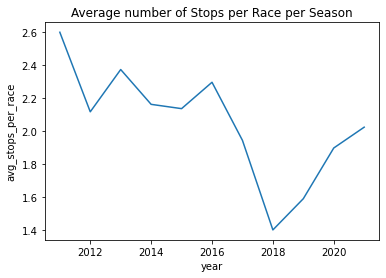

In [34]:
sns.lineplot(x=df_pit_stops_number['year'], y=df_pit_stops_number['avg_stops_per_race']).set_title('Average number of Stops per Race per Season')

## Number of Collisions (Driver could not finish race) per Year

In [35]:
df_results = df_results.merge(status, on="statusId", how='left')

In [36]:
df_results_col = df_results[(df_results['status']=='Collision') | (df_results['status']=='Collision damage')]
df_results_col = df_results_col.groupby(['year']).count().reset_index()

Text(0, 0.5, 'Number of Collisions')

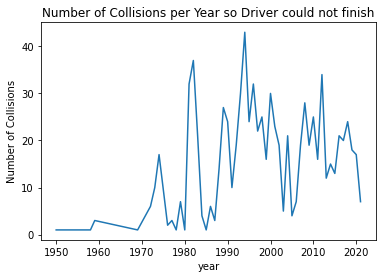

In [42]:
sns.lineplot(x=df_results_col['year'], y=df_results_col['status']).set_title('Number of Collisions per Year so Driver could not finish')
plt.ylabel('Number of Collisions')

Based on this plot it looks like the numbe of collisions increased over time. But taken the number of races per season into account this get relativised.

## Average Number of Lappings in a Race per Season

In [47]:
df_results_lap = df_results[df_results['status'].str.startswith('+')]
df_results_lap['Laps behind'] = df_results_lap['status'].str[1:-4].astype(int)
df_lapings_seas = df_results_lap.groupby('raceId').sum().reset_index()[['raceId', 'Laps behind']].rename({'Laps behind':'Avg Laps behind'})
df_results_lap = df_results_lap[['year', 'raceId']].merge(df_lapings_seas, on='raceId', how='left')
df_results_lap = df_results_lap.drop_duplicates()
df_results_lap = df_results_lap.groupby('year').mean().reset_index()

/var/folders/86/jj_j7bm56glckk9r2cy1875h0000gn/T/ipykernel_27000/2894694879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_lap['Laps behind'] = df_results_lap['status'].str[1:-4].astype(int)


Text(0, 0.5, '')

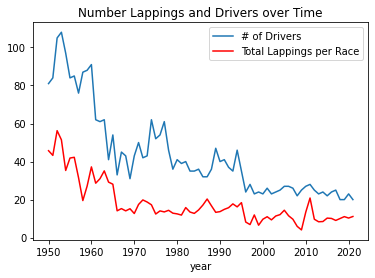

In [49]:
sns.lineplot(x=race_winners['year'],y=race_winners['#ofDrivers'])
sns.lineplot(x=df_results_lap['year'],y=df_results_lap['Laps behind'], color="r").set_title('Number Lappings and Drivers over Time')
plt.legend(labels=['# of Drivers', 'Total Lappings per Race'])
plt.ylabel('')

## How did the max speed evolved

In [52]:
df_results_speed = df_results.groupby('year').mean().reset_index()

Text(0.5, 1.0, 'Average Season-Race Top Speed over Time')

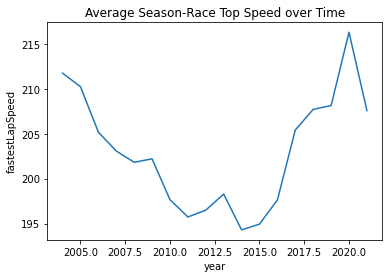

In [53]:
sns.lineplot(x=df_results_speed['year'], y=df_results_speed['fastestLapSpeed']).set_title('Average Season-Race Top Speed over Time')